p# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW2_ID1_ID2.file"
<br>
Good Luck!
</p>

In [1]:
print(1+1)

2


# Question 1 - Generalizrtion and Overfit (30 pt)

<p style="font-size: 17px"> In this exercise, we will demonstrate overfitting to random labels.The settings are the following:
<ul style="font-size: 17px">
<li> Use the MNIST dataset.
<li> Work on the first 128 samples from the training dataset.
<li> Fix the following parameters:
    <ul>
        <li> Shuffle to False.
        <li> Batch size to 128.
    </ul>
<li> Generate random labels from Bernoulli distribution with a probability of $\frac{1}{2}$. I.e.,each sample is assigned a random label which is zero or one.
</ul>

<p style="font-size: 17px">
Show that by using a Fully Connected netwrok and cross-entropy loss, you are able to achieve a loss value of ~0 (the lower the better).
Plot the accuracy and loss convergence for this data and the test data as a function of epochs.
What is the accuracy value of the test data? Explain
</p>

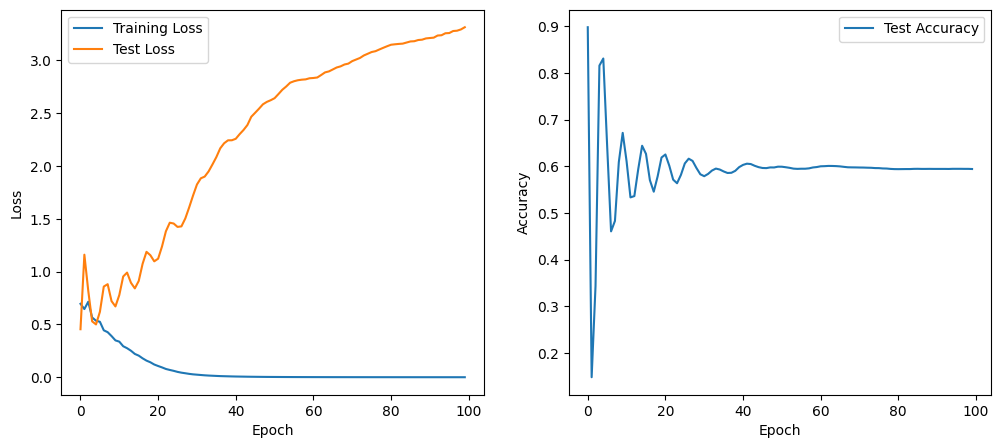

Final Test Accuracy: 0.5942000150680542


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Select first 128 samples
train_data = train_dataset.data[:128].float().view(128, -1) / 255.0
train_labels = torch.from_numpy(np.random.binomial(1, 0.5, 128)).float()

test_data = test_dataset.data.float().view(-1, 28*28) / 255.0
test_labels = (test_dataset.targets == 0).float()
# Define model
class FCNetwork(nn.Module):
    def __init__(self):
        super(FCNetwork, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = FCNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
train_losses, test_losses, test_accuracies = [], [], []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_data)
    loss = criterion(outputs.squeeze(), train_labels)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(test_data)
        test_loss = criterion(test_outputs.squeeze(), test_labels)
        test_losses.append(test_loss.item())
        test_predictions = (test_outputs.squeeze() > 0.5).float()
        test_accuracy = (test_predictions == test_labels).float().mean().item()
        test_accuracies.append(test_accuracy)

# Plot results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

print(f"Final Test Accuracy: {test_accuracies[-1]}")

********************

<h1> Question 2 - Sentiment Analysis - Classification (70 pt)</h1>

### Exercise
<p style="font-size: 17px">
The goal of this exercise is to get familiar with recurrent neural networks.
<br><br>
The field of detecting which emotion is represented in a text is developing and being
studied due to its usefulness. For example, detecting if a review is positive or
negative and more.
<br><br>
In this exercise, you will detect the emotion of a sentence. You should get at least 47% accuracy on the test set.
<br><br>
You should
<ul style="font-size: 17px">
  <li> Try different model architectures - Vanilla RNN and Gated model (GRU/LSTM)</li>
  <li> Use different optimization and regularization methods </li>
  <li> Try different combinations of hyperparamters</li>
</ul>
</p>

<br>

### Data

<p style="font-size: 17px">
The data is a csv file containing tweets and their labels according to the emotion –
{happiness, sadness, neutral}. Every row in the file (except for the header) is an
example.
<br>
Examples: (Notepad++ view)
<ul style="font-size: 17px">
  <li> happiness,Welcome @doeko ! Really glad to know you here. Your products rox man</li>
  <li> sadness,Disappointment really sucks! I'm getting used to it.</li>
  <li> neutral,I just want to Sleep.</li>
</ul>
<p style="font-size: 17px">
You have a train file – "trainEmotions.csv" and a test file – "testEmotions.csv". Both files can be found in the "HW2_data.zip" file.
</p>

### Tips

<p style="font-size: 17px">
Instead of using One-hot embeddings for the data, use <code>nn.Embedding</code>.
You also might add "Start Of Sentence" (SOS) and "End Of Sentence" (EOS) embeddings.
</p>

### a) EDA (10 pt)

<p style="font-size: 17px">
Explore and analyze your data. Explain your data cleaning and processing pipeline.
</p>

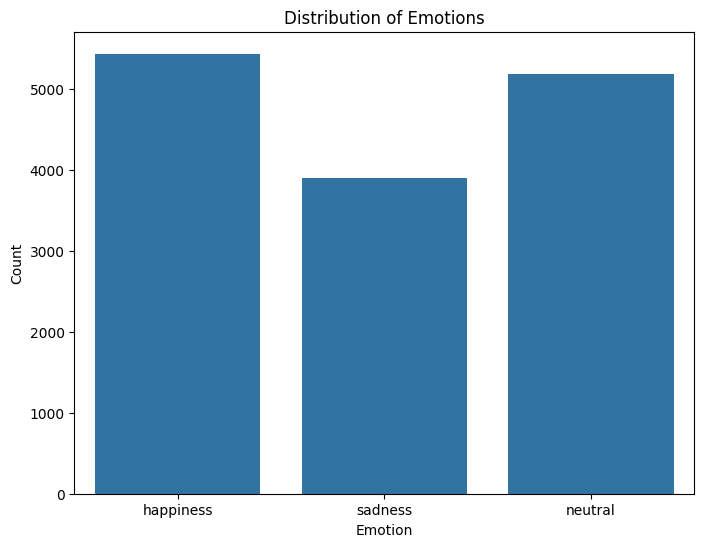


Statistics on text lengths:
count    14505.000000
mean        70.778145
std         36.513064
min          1.000000
25%         40.000000
50%         65.000000
75%        100.000000
max        161.000000
Name: text_length, dtype: float64


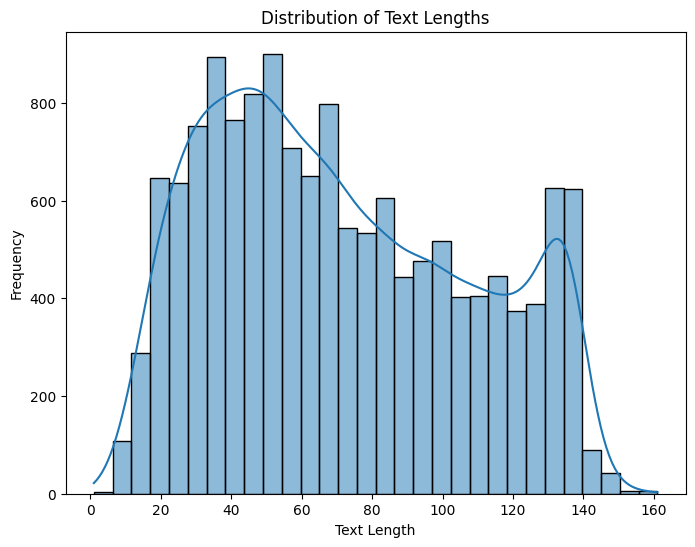


Number of missing values per column:
emotion        0
text           0
text_length    0
dtype: int64


10 most common words of 5 letters or longer:
happy: 723
going: 496
about: 417
thanks: 406
&amp;: 358
really: 352
great: 343
today: 311
don't: 308
mother's: 289


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
df = pd.read_csv('/trainEmotions.csv', header=None, names=['emotion', 'text'])

# Plotting emotion distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='emotion', data=df[1:])
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


# Analyze text lengths
df['text_length'] = df['text'].apply(len)
print("\nStatistics on text lengths:")
print(df['text_length'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


# Example: Check for missing values (if any)
print("\nNumber of missing values per column:")
print(df.isnull().sum())
print("\n")


# Combine all text into a single string
all_text = ' '.join(df['text'].tolist())

# Tokenize the text (split into words)
words = [word for word in all_text.lower().split() if len(word) >= 5]

# Count word frequencies
word_counts = Counter(words)

# Get the 5 most common words
most_common_words = word_counts.most_common(10)

# Print the results
print("10 most common words of 5 letters or longer:")
for word, count in most_common_words:
    print(f"{word}: {count}")

*****************************

### b) Main (50 pt)

<p style="font-size: 17px">
Define 2 models, as requested. Train and eval them.
<ul style="font-size: 17px">
<li> Plot the gated model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> Plot a confusion matrix
</ul>

</p>

.vector_cache/glove.6B.zip: 862MB [02:40, 5.37MB/s]                           
100%|█████████▉| 399999/400000 [00:20<00:00, 19139.06it/s]
<ipython-input-2-adacde64ee45>:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  return torch.tensor(embeddings).float()


Final Test Acc: 0.3697


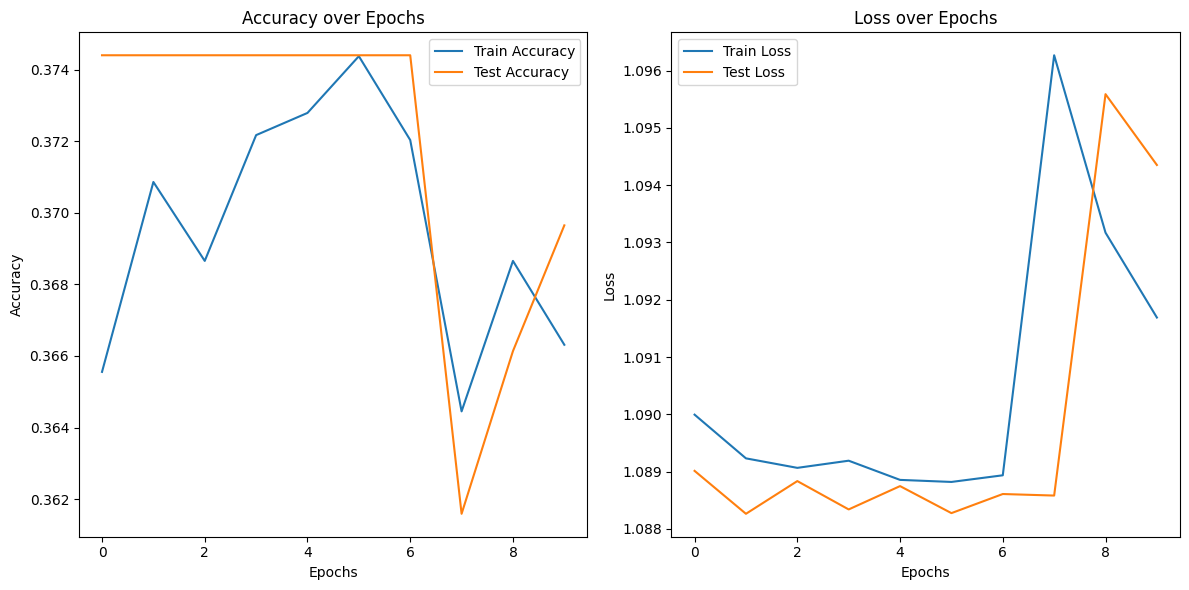

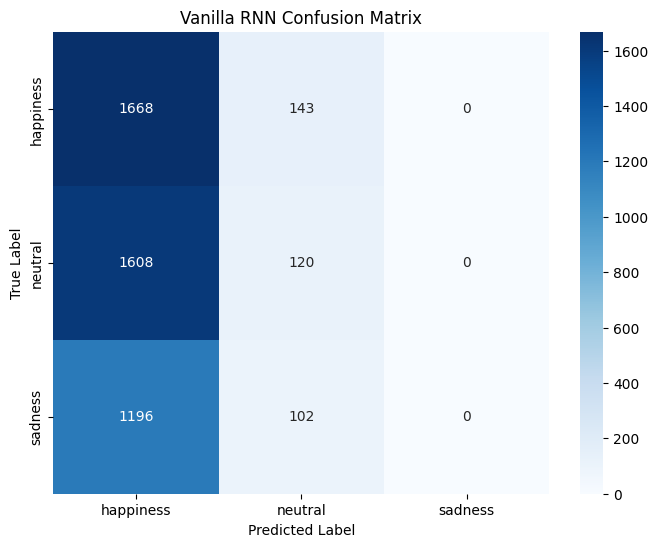

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.vocab import GloVe
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load data
train_data = pd.read_csv('/trainEmotions.csv')
X_train = train_data['content']  # Renamed for consistency
y_train = train_data['emotion']  # Renamed for consistency
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

test_data = pd.read_csv('/testEmotions.csv')
X_test = test_data['content']
y_test = label_encoder.transform(test_data['emotion'])  # Encode using the same LabelEncoder

# Load GloVe embeddings (100-dimensional)
glove = GloVe(name='6B', dim=100)

# Function to convert text to embeddings
def text_to_embedding(text, glove, max_len=50):
    tokens = text.split()
    embeddings = []
    for token in tokens:
        if token in glove.stoi:
            embeddings.append(glove[token].numpy())
        else:
            embeddings.append(np.zeros(glove.dim))
    if len(embeddings) < max_len:
        embeddings.extend([np.zeros(glove.dim)] * (max_len - len(embeddings)))
    else:
        embeddings = embeddings[:max_len]
    return torch.tensor(embeddings).float()

# Convert text to embeddings
X_train_embeddings = torch.stack([text_to_embedding(text, glove) for text in X_train])
X_test_embeddings = torch.stack([text_to_embedding(text, glove) for text in X_test])

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_embeddings, y_train_tensor)
test_dataset = TensorDataset(X_test_embeddings, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Vanilla RNN model
class VanillaRNN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(VanillaRNN, self).__init__()
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]
        out = self.fc(out)
        out = self.softmax(out)
        return out

# Hyperparameters
embedding_dim = 100
hidden_dim = 128
output_dim = len(np.unique(y_train))

# Initialize the model
vanilla_rnn = VanillaRNN(embedding_dim, hidden_dim, output_dim)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer_rnn = optim.Adam(vanilla_rnn.parameters(), lr=0.001)

# Training function
def train_model(model, optimizer, criterion, train_loader, test_loader, num_epochs=10):
    train_accs, train_losses, test_accs, test_losses = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            correct_train += (predictions.argmax(1) == y_batch).sum().item()
            total_train += y_batch.size(0)

        train_acc = correct_train / total_train
        train_accs.append(train_acc)
        train_losses.append(total_train_loss / len(train_loader))

        # Evaluation on test set
        model.eval()
        total_test_loss = 0
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)
                total_test_loss += loss.item()
                correct_test += (predictions.argmax(1) == y_batch).sum().item()
                total_test += y_batch.size(0)

        test_acc = correct_test / total_test
        test_accs.append(test_acc)
        test_losses.append(total_test_loss / len(test_loader))

    print(f"Final Test Acc: {test_acc:.4f}")

    return train_accs, train_losses, test_accs, test_losses

train_accs_rnn, train_losses_rnn, test_accs_rnn, test_losses_rnn = train_model(vanilla_rnn, optimizer_rnn, criterion, train_loader, test_loader)

# Plot training and testing accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accs_rnn, label="Train Accuracy")
plt.plot(test_accs_rnn, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")

# Plot training and testing loss
plt.subplot(1, 2, 2)
plt.plot(train_losses_rnn, label="Train Loss")
plt.plot(test_losses_rnn, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")

plt.tight_layout()
plt.show()

# Get predictions on the test set
model = vanilla_rnn
model.eval()
all_predictions = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        predictions = model(X_batch).argmax(1).cpu().numpy()
        all_predictions.extend(predictions)

# Generate confusion matrix
cm = confusion_matrix(y_test, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Vanilla RNN Confusion Matrix")
plt.show()


Final Test Acc: 0.5055


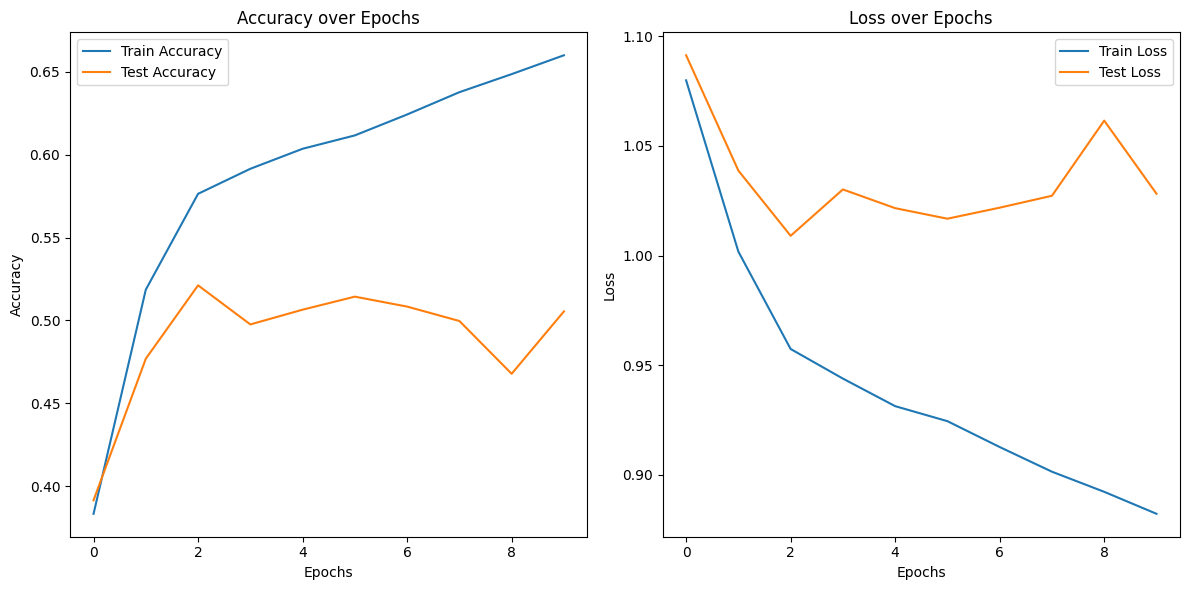

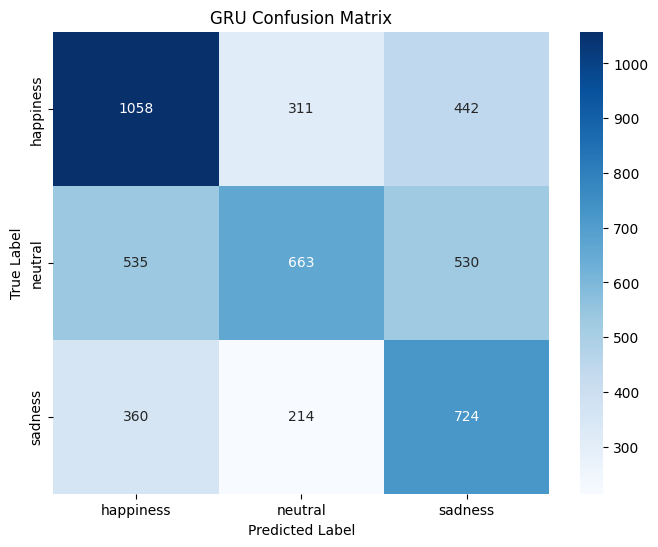

In [5]:
class GRUModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Get the output of the GRU
        out, _ = self.gru(x)
        # Use the last hidden state for classification
        out = out[:, -1, :]
        out = self.fc(out)
        out = self.softmax(out)
        return out

# Initialize models
gru_model = GRUModel(embedding_dim, hidden_dim, output_dim)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer_gru = optim.Adam(gru_model.parameters(), lr=0.001)

  # Train GRU
#train_accs_gru, train_losses_gru = train_model(gru_model, optimizer_gru, criterion, train_loader)
train_accs_gru, train_losses_gru, test_accs_gru, test_losses_gru = train_model(gru_model, optimizer_gru, criterion, train_loader, test_loader)



# Plot training and testing accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accs_gru, label="Train Accuracy")
plt.plot(test_accs_gru, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")

# Plot training and testing loss
plt.subplot(1, 2, 2)
plt.plot(train_losses_gru, label="Train Loss")
plt.plot(test_losses_gru, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")

plt.tight_layout()
plt.show()


# Get predictions on the test set
model = gru_model
model.eval()
all_predictions = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        predictions = model(X_batch).argmax(1).cpu().numpy()
        all_predictions.extend(predictions)

# Generate confusion matrix
cm = confusion_matrix(y_test, all_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("GRU Confusion Matrix")
plt.show()

### c) Discussion (10 pt)
<p style="font-size: 17px">
The Vanilla RNN and GRU models show notable differences in performance. The GRU achieves higher training and test accuracy (Final Test Acc: 0.5055) compared to the Vanilla RNN, which struggles with stagnant or inconsistent accuracy across epochs. Loss trends for the GRU exhibit more stable convergence, whereas the Vanilla RNN shows erratic spikes, suggesting optimization challenges. The confusion matrices reveal the GRU's better ability to classify "neutral" and "sadness" emotions compared to the RNN, which predominantly predicts "happiness." These results highlight the GRU's ability to handle sequential data and retain long-term dependencies.